In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout, Permute,Flatten
from keras import optimizers, Input, Model
from attention import Attention
from keras.callbacks import ModelCheckpoint
from sklearn.svm import NuSVR, SVR
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':20})

Using TensorFlow backend.


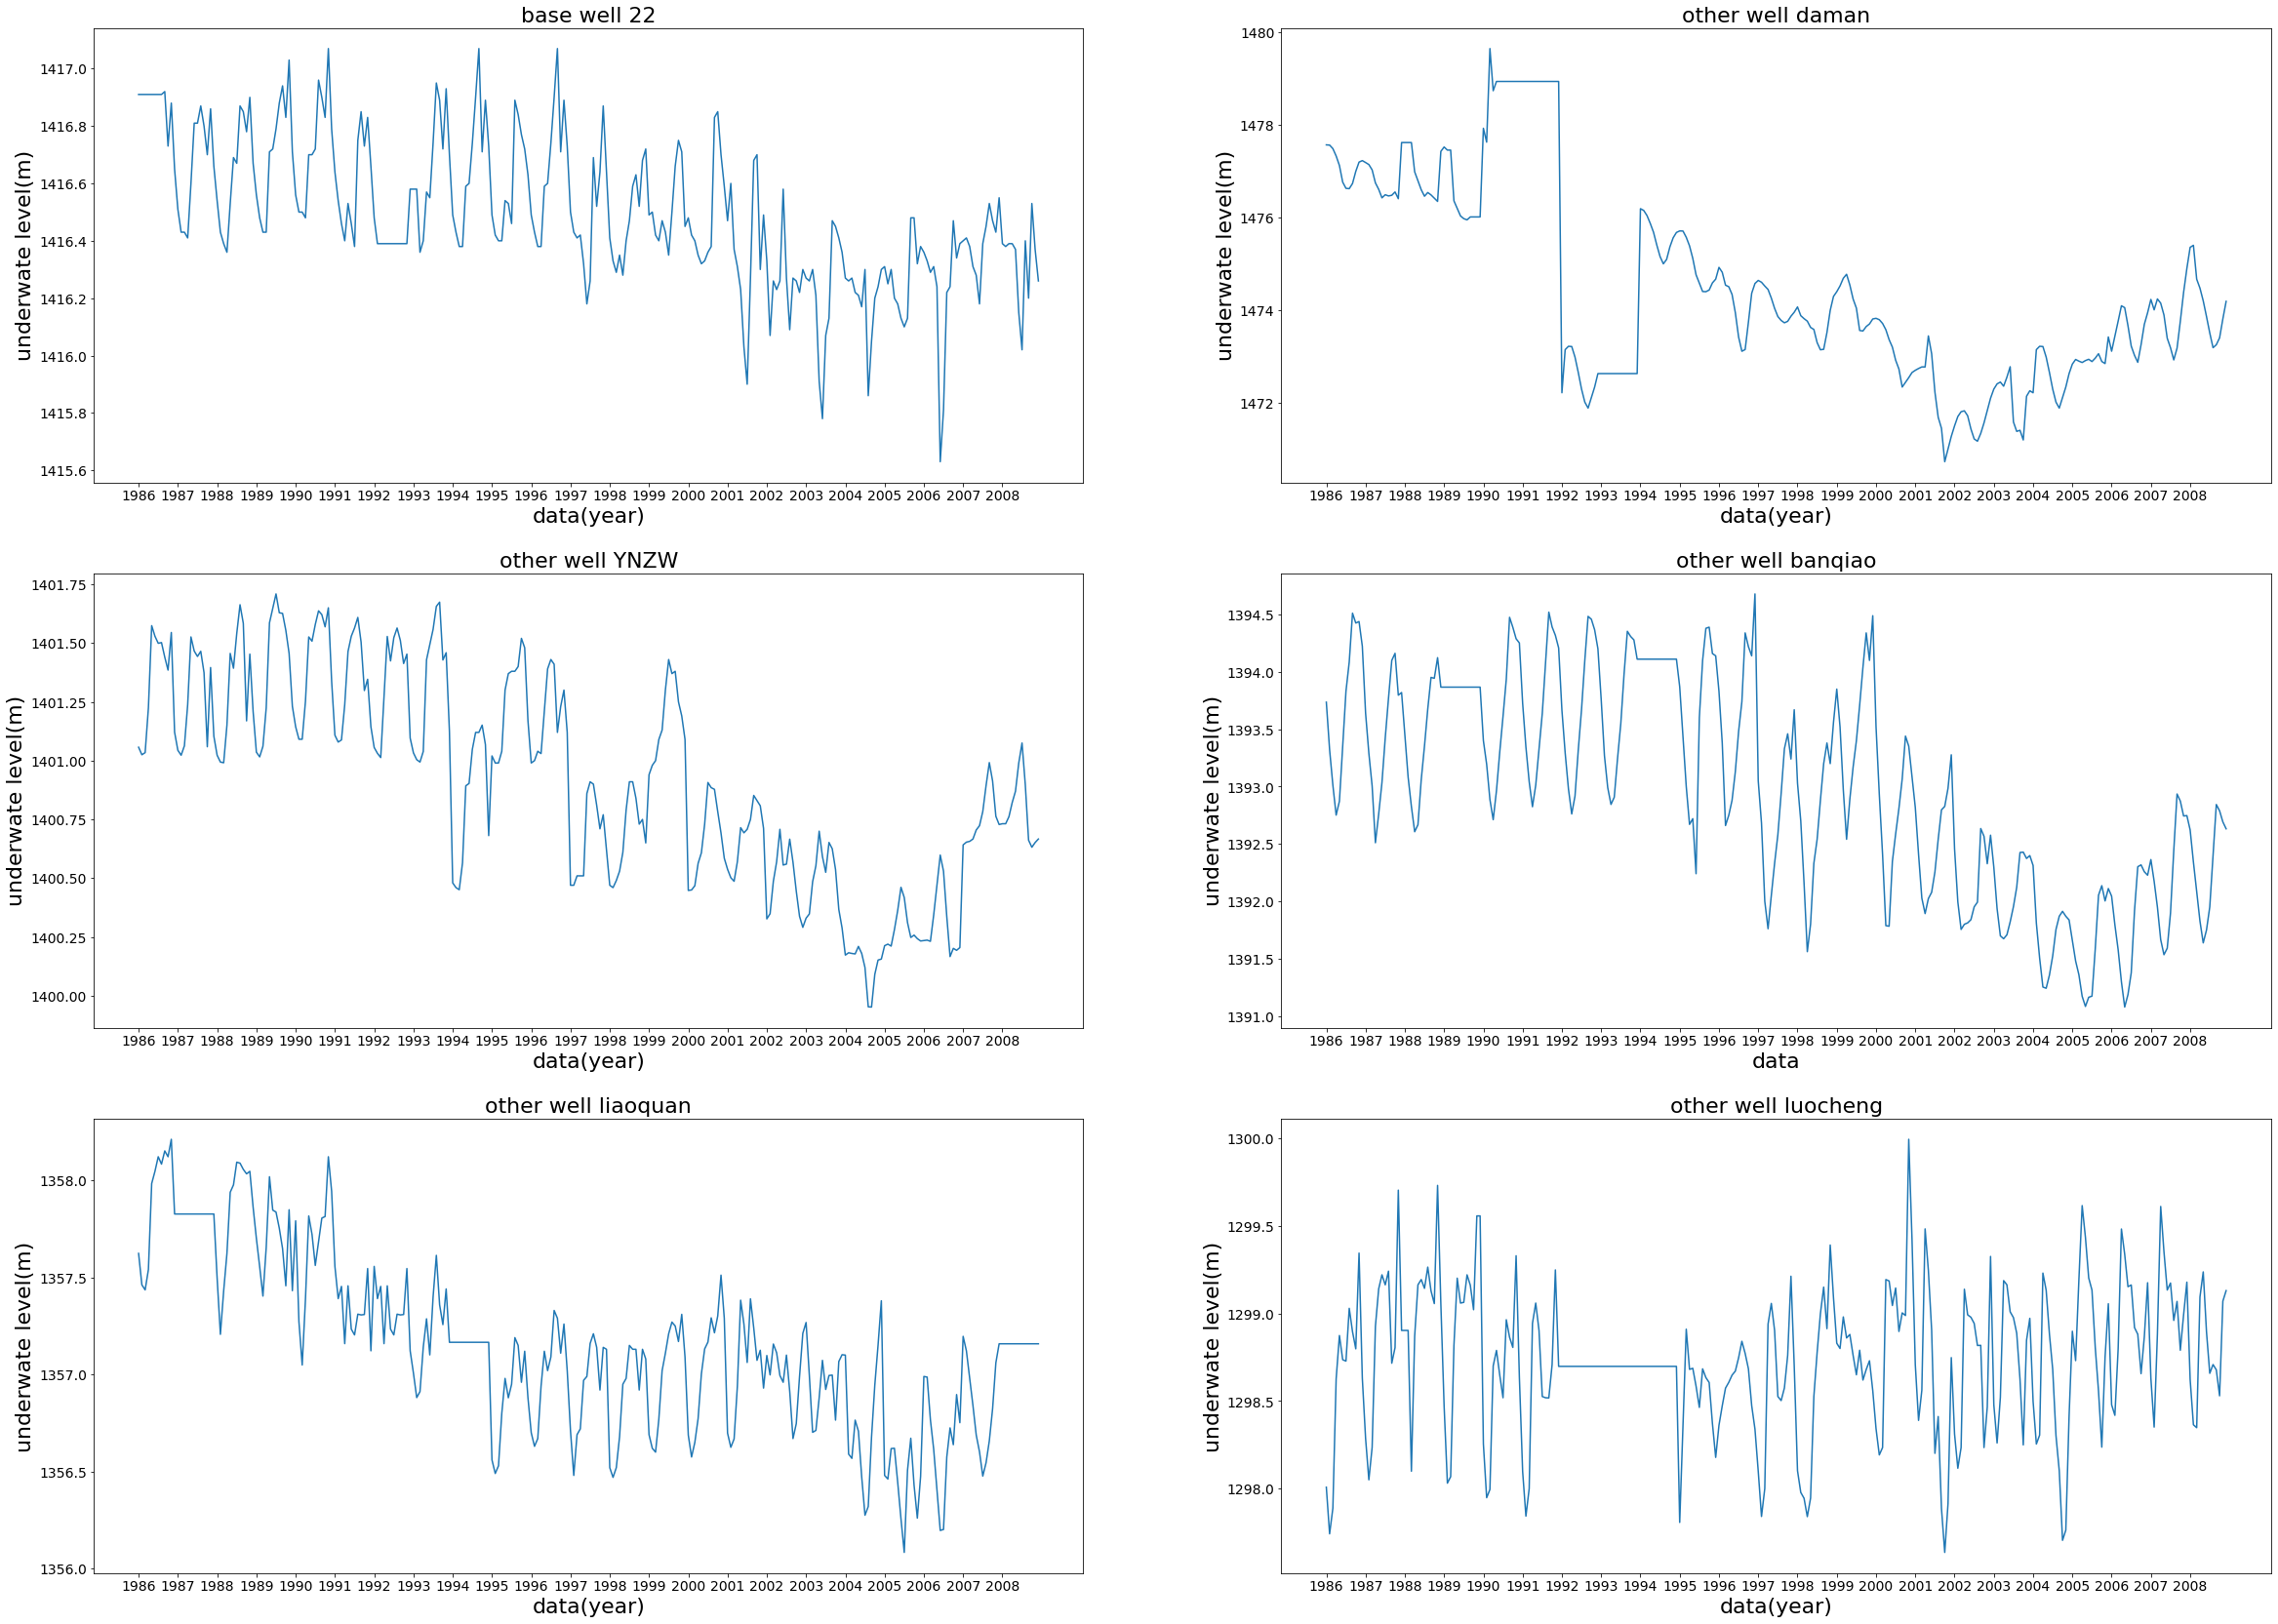

In [2]:
plt.rcParams['figure.figsize'] = (40.0, 60.0)
plt.rcParams.update({'font.size':14})
train_data = pd.read_excel('underwater_rawdata/underwater.xlsx')
data_daman = np.array(train_data['daman-obs'])
data_ynzw = np.array(train_data['yanuan-obs'])
data_banqiao = np.array(train_data['banqiao-obs'])
data_liaoquan = np.array(train_data['liaoquan-obs'])
data_22 = np.array(train_data['22-obs'])
data_luocheng = np.array(train_data['luocheng-obs'])
data_yingluo = np.array(train_data['yingluo'])
data_liyuan = np.array(train_data['liyuan'])
data_zhengyi = np.array(train_data['zhengyi'])
data_gaoya = np.array(train_data['gaoya'])
year = range(1986,2009,1)
x = range(0, 276, 12)
LABEL_fontszie = 22
plt.figure()
plt.subplot(621)
plt.plot(data_22)
plt.title('base well 22', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.xticks(x, year)
plt.subplot(622)
plt.title('other well daman', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_daman)
plt.xticks(x, year)
plt.subplot(623)
plt.title('other well YNZW', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_ynzw)
plt.xticks(x, year)
plt.subplot(624)
plt.title('other well banqiao', fontsize=LABEL_fontszie)
plt.xlabel('data', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_banqiao)
plt.xticks(x, year)
plt.subplot(625)
plt.title('other well liaoquan', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_liaoquan)
plt.xticks(x, year)
plt.subplot(626)
plt.title('other well luocheng', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_luocheng)
plt.xticks(x, year)
# plt.set_ticks_position('bottom')
plt.show()

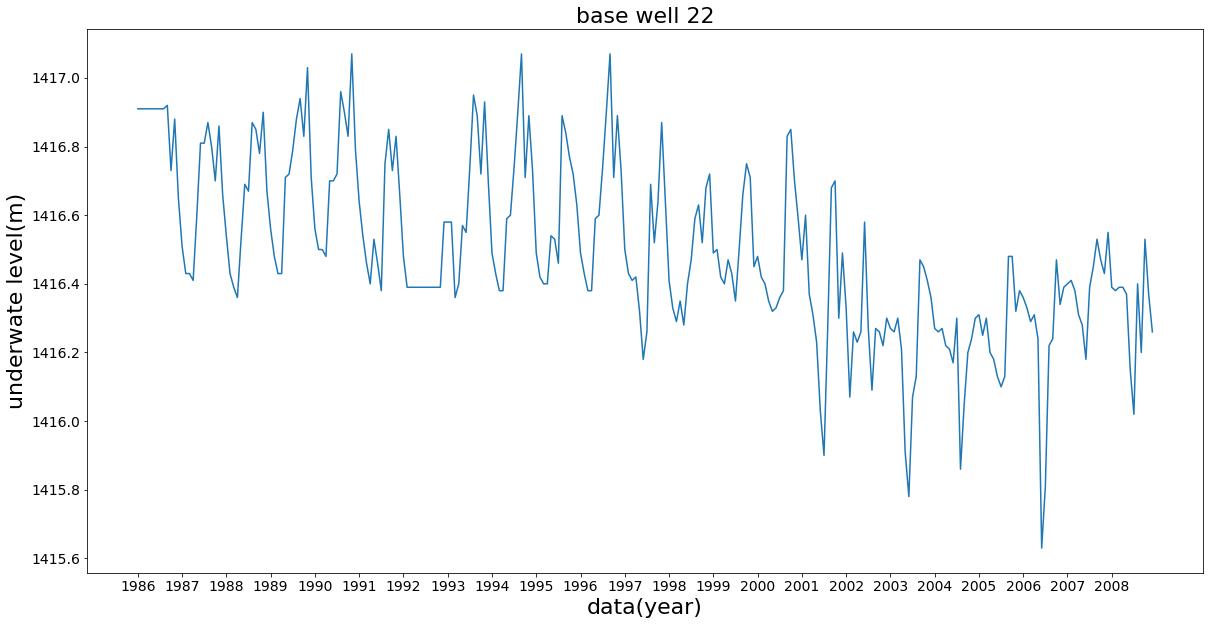

In [5]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':14})
train_data = pd.read_excel('underwater_rawdata/underwater.xlsx')
data_22 = np.array(train_data['22-obs'])
year = range(1986,2009,1)
x = range(0, 276, 12)
LABEL_fontszie = 22
plt.figure()
plt.plot(data_22)
plt.title('base well 22', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.xticks(x, year)
plt.show()

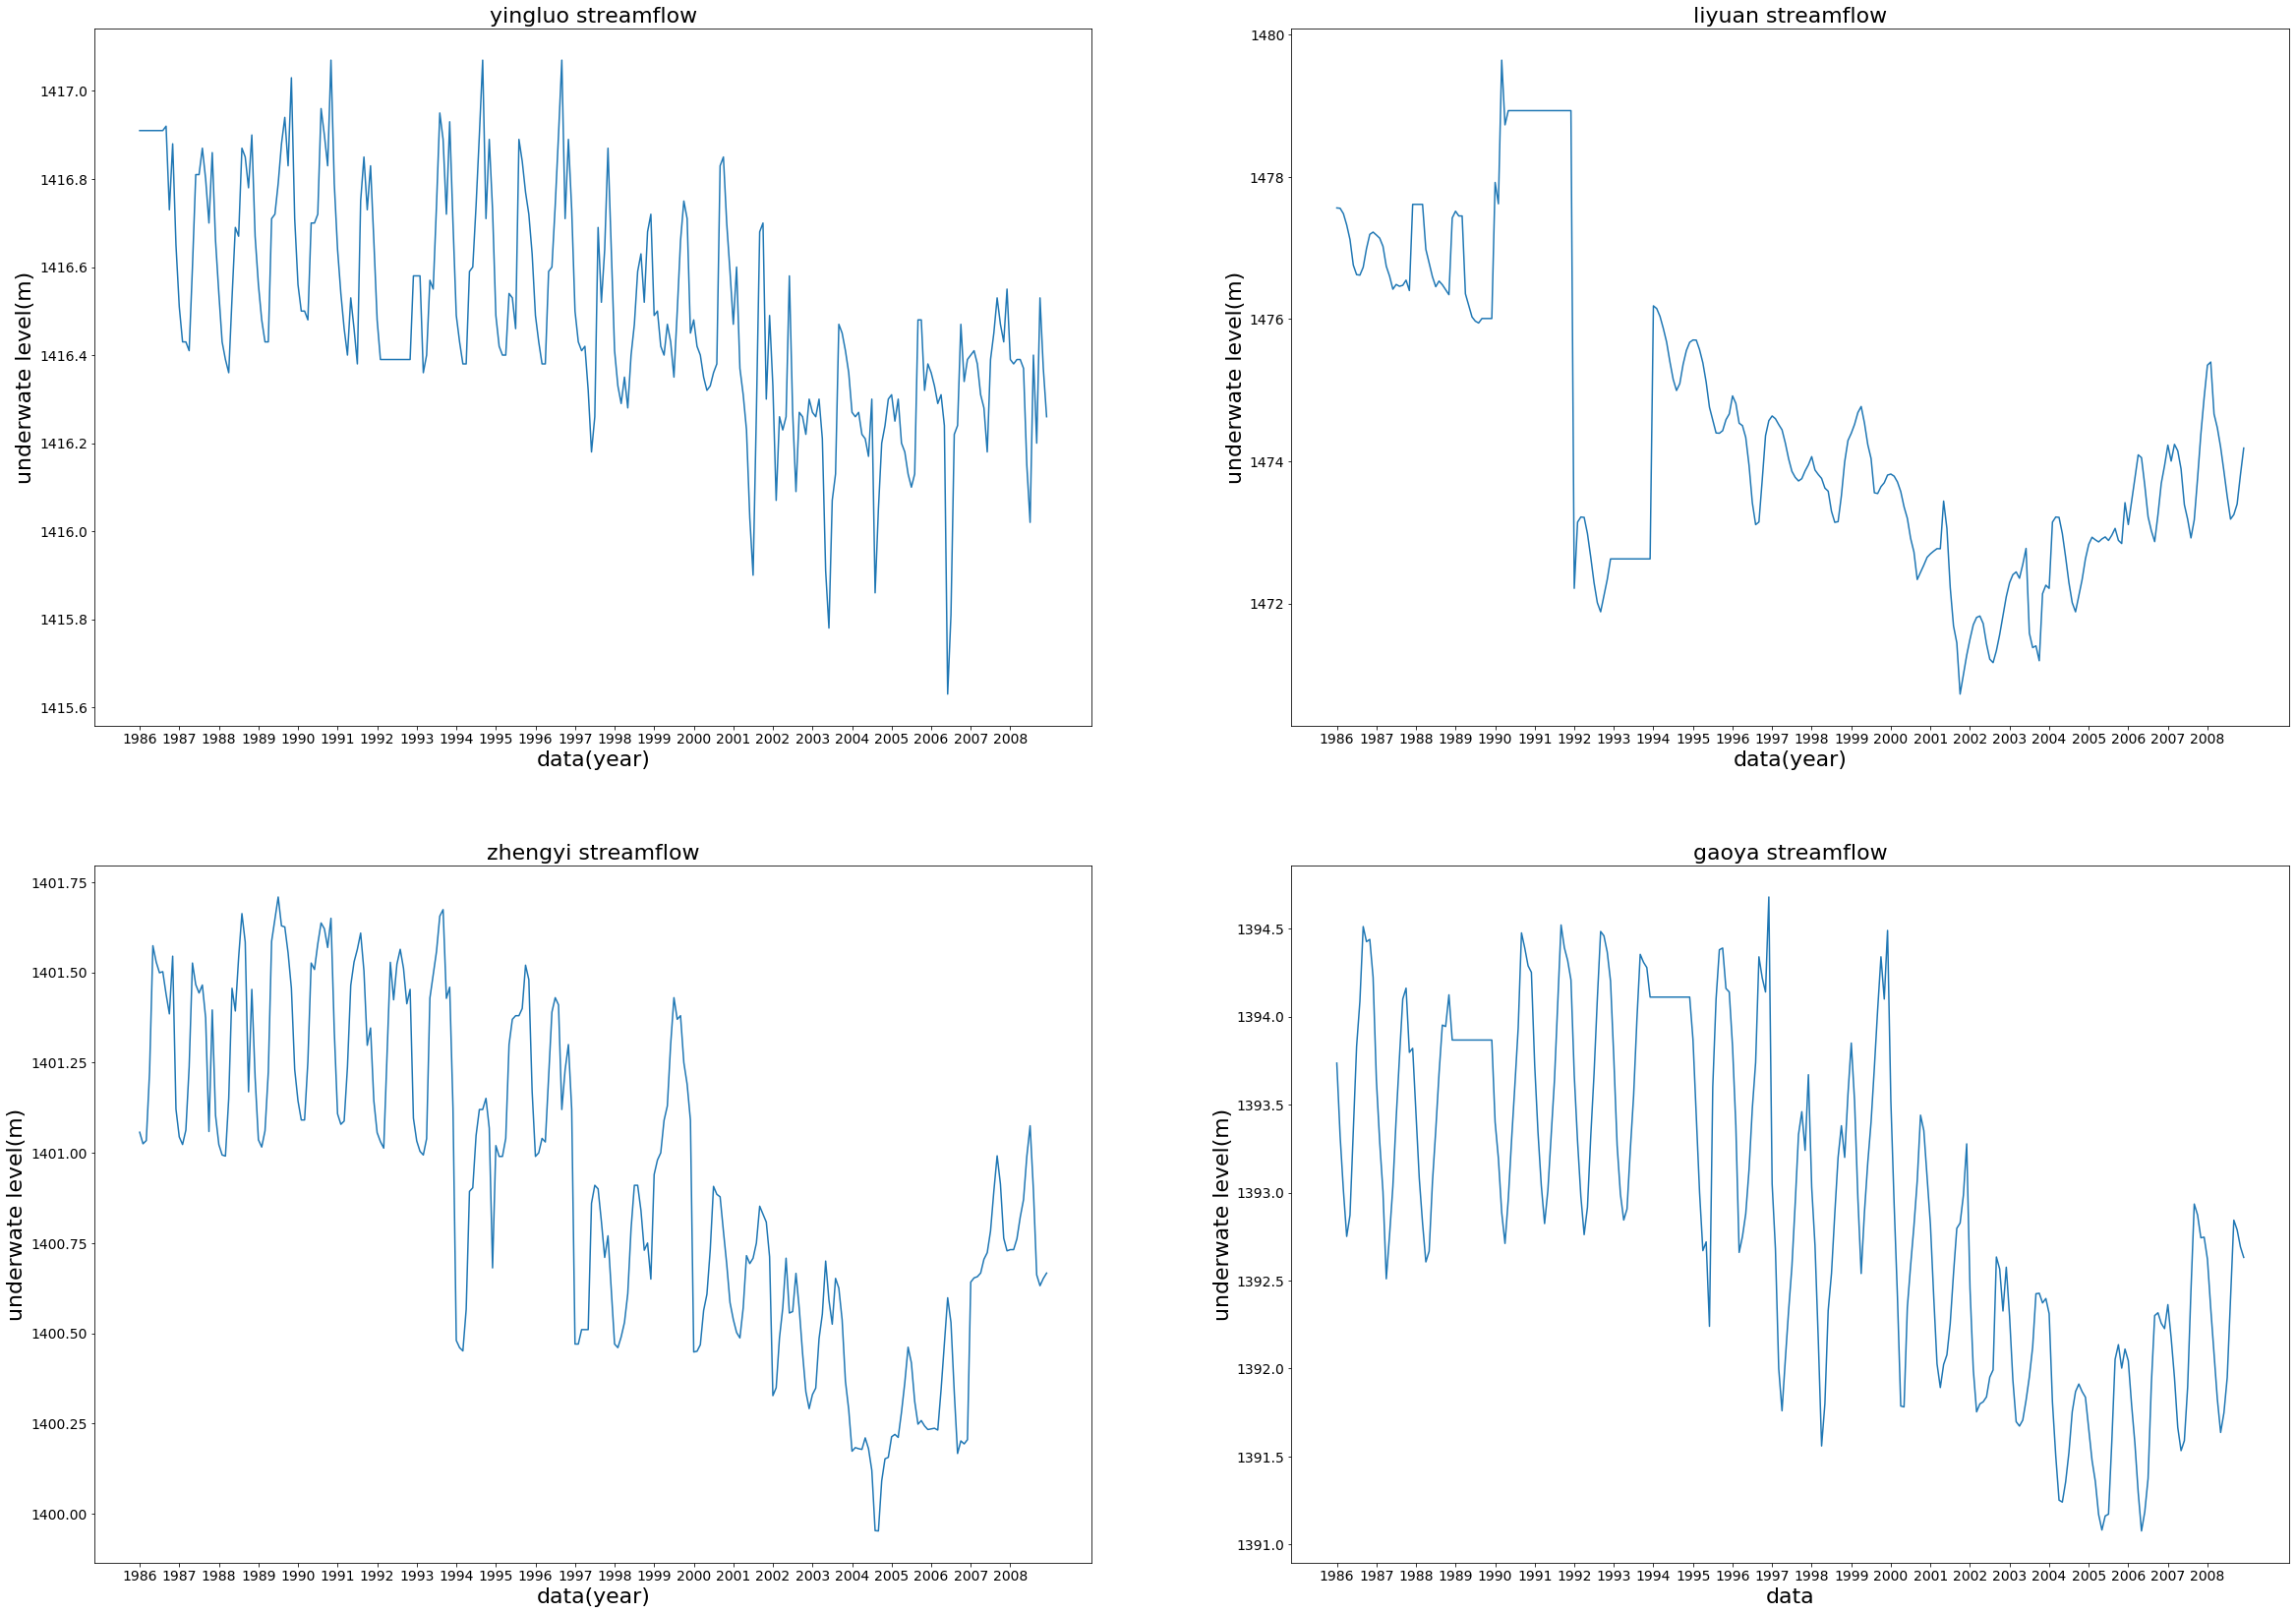

In [3]:
year = range(1986,2009,1)
x = range(0, 276, 12)
LABEL_fontszie = 22
plt.figure()
plt.subplot(421)
plt.plot(data_22)
plt.title('yingluo streamflow', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.xticks(x, year)
plt.subplot(422)
plt.title('liyuan streamflow', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_daman)
plt.xticks(x, year)
plt.subplot(423)
plt.title('zhengyi streamflow', fontsize=LABEL_fontszie)
plt.xlabel('data(year)', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_ynzw)
plt.xticks(x, year)
plt.subplot(424)
plt.title('gaoya streamflow', fontsize=LABEL_fontszie)
plt.xlabel('data', fontsize=LABEL_fontszie)
plt.ylabel('underwate level(m)', fontsize=LABEL_fontszie)
plt.plot(data_banqiao)
plt.xticks(x, year)
# plt.set_ticks_position('bottom')
plt.show()

In [3]:
input_dim = 12
output_dim = 1
train_data = pd.read_excel('underwater_rawdata/underwater.xlsx')
data_daman = np.array(train_data['daman-obs'])
data_ynzw = np.array(train_data['yanuan-obs'])
data_banqiao = np.array(train_data['banqiao-obs'])
data_liaoquan = np.array(train_data['liaoquan-obs'])
data_22 = np.array(train_data['22-obs'])
data_luocheng = np.array(train_data['luocheng-obs'])
data = np.stack((data_daman,data_ynzw,data_banqiao,data_liaoquan,data_luocheng,data_22),axis=1)
scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
test_x,test_y = [],[]
for i in range(240, 264):
    test_x.append(data_scaled[i:i+input_dim])
    test_y.append((data_22[i+input_dim:i+input_dim+output_dim]-min(data_22))*100)
test_x = np.array(test_x)
test_y = np.array(test_y)
X_train,y_train = [],[]
for i in range(240):
    X_train.append(data_scaled[i:i+input_dim])
    y_train.append((data_22[i+input_dim:i+input_dim+output_dim]-min(data_22))*100)    
X_train = np.array(X_train)
y_train = np.array(y_train)
X_data,y_data = [],[]
for i in range(264):
    X_data.append(data_scaled[i:i+input_dim])
    y_data.append((data_22[i+input_dim:i+input_dim+output_dim]-min(data_22))*100)    
X_data = np.array(X_data)
y_data = np.array(y_data)

In [97]:
# 划分验证集
train_num = 240
train_x = X_train[:train_num, :, :]
train_y = y_train[:train_num, :]
valid_x = X_train[train_num:, :, :]
valid_y = y_train[train_num:, :]

In [3]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':20})
def plot_forecast(model,test_x,title):
    """Plot the model's forecast on the train and test datasets
    """
    testPredict = model.predict(test_x)
    plt.plot(testPredict.reshape(-1),'r',label = ' predict')
    plt.plot(range(12),(data_22[-12:]-min(data_22))*100,'b',label = 'real')
    plt.xlabel('data')
    plt.ylabel('underwate level(mm)')
    plt.title(str(title)+' test(day)')
    plt.legend()
    plt.show()
    mae_score = mean_absolute_error((data_22[-12:]-min(data_22))*100, testPredict.reshape(-1))
    rmse_score = rmse((data_22[-12:]-min(data_22))*100, testPredict.reshape(-1))
    r2_score = r2_score((data_22[-6:]-min(data_22))*100, testPredict.reshape(-1))
    print('TEST MAE Score: '+str(mae_score))
    print('TEST RMSE Score: '+str(rmse_score))
    print('TEST R2 Score:' + str(r2_score))
def plot_loss(history):
    """Plot the learning curve
    """
    plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
    plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc = 'best')
    plt.show()

In [4]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':20})
def plot_forecast(model,test_x,title):
    """Plot the model's forecast on the train and test datasets
    """
    testPredict = []
    for temp in test_x:
        temp = np.expand_dims(temp, axis=0)
        predict_res = model.predict(temp)
        testPredict.append(predict_res)
    plt.plot(np.array(testPredict).reshape(-1)/100 + min(data_22),'r',label = ' predict')
    plt.plot(range(len(testPredict)), data_22[-len(testPredict):],'b',label = 'real')
    plt.xlabel('data')
    plt.ylabel('underwate level(m)')
    plt.title(str(title)+' test(day)')
    plt.legend()
    plt.show()
    mae_score = mean_absolute_error(data_22[-len(testPredict):], np.array(testPredict).reshape(-1)/100 + min(data_22))
    rmse_score = rmse(data_22[-len(testPredict):], np.array(testPredict).reshape(-1)/100 + min(data_22))
    r2_res = r2_score(data_22[-len(testPredict):], np.array(testPredict).reshape(-1)/100 + min(data_22))
    print(title + ' MAE Score: '+str(mae_score))
    print(title + ' RMSE Score: '+str(rmse_score))
    print(title + ' R2 Score:' + str(r2_res))
    return np.array(testPredict).reshape(-1)/100 + min(data_22)
def plot_loss(history):
    """Plot the learning curve
    """
    plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'])
#     plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train'], loc = 'best')
    plt.show()

In [5]:
SVRModel = SVR(C=5.0, epsilon = 0.01)
SVRModel.fit(X_train.reshape(-1, 12*6), y_train.reshape(-1, 1))

/Users/v_zhouhan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/v_zhouhan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=5.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

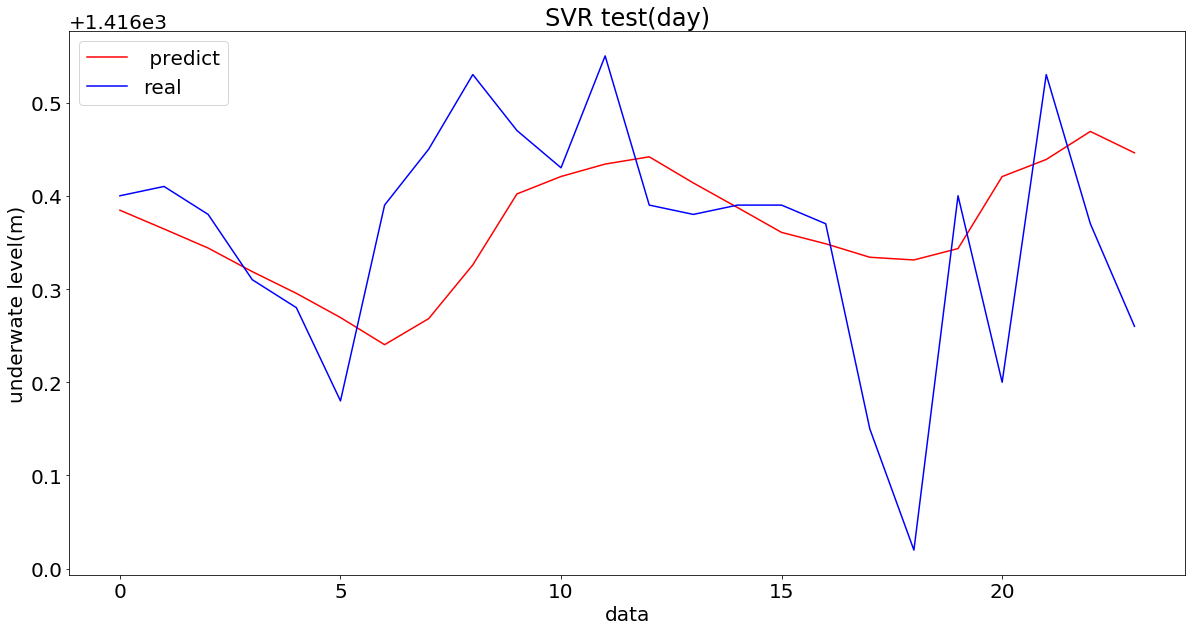

SVR MAE Score: 0.0927884179202086
SVR RMSE Score: 0.12376237655351356
SVR R2 Score:-0.004687637613203455


array([1416.38449628, 1416.36438504, 1416.34393095, 1416.31866771,
       1416.29537134, 1416.26939705, 1416.24029237, 1416.2682401 ,
       1416.32591665, 1416.40195625, 1416.42069179, 1416.43399685,
       1416.44178642, 1416.41372893, 1416.3874035 , 1416.36069843,
       1416.34853335, 1416.33405577, 1416.33117308, 1416.34338202,
       1416.42057196, 1416.43895392, 1416.46899454, 1416.44605273])

In [6]:
plot_forecast(SVRModel,test_x.reshape(-1, 12*6),'SVR')

In [7]:
attention = Sequential()
attention.add(LSTM(128, input_shape = (12,6), return_sequences = True))
attention.add(Attention())
attention.add(Dense(1))
attention.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 12, 128)           69120     
_________________________________________________________________
attention_1 (Attention)      (None, 128)               140       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 69,389
Trainable params: 69,389
Non-trainable params: 0
_________________________________________________________________


In [8]:
adam = optimizers.Adam(lr=0.01)
attention.compile(loss = 'mean_squared_error', optimizer = adam)
history_attention = attention.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1)
# attention.save('model/attention.h5')

Epoch 1/100
240/240 [==============================] - 1s 4ms/step - loss: 7220.8739
Epoch 2/100
240/240 [==============================] - 0s 626us/step - loss: 5045.3562
Epoch 3/100
240/240 [==============================] - 0s 574us/step - loss: 3552.2601
Epoch 4/100
240/240 [==============================] - 0s 565us/step - loss: 2567.3832
Epoch 5/100
240/240 [==============================] - 0s 670us/step - loss: 1823.0487
Epoch 6/100
240/240 [==============================] - 0s 716us/step - loss: 1306.2820
Epoch 7/100
240/240 [==============================] - 0s 624us/step - loss: 977.4415
Epoch 8/100
240/240 [==============================] - 0s 660us/step - loss: 785.1818
Epoch 9/100
240/240 [==============================] - 0s 580us/step - loss: 679.6654
Epoch 10/100
240/240 [==============================] - 0s 570us/step - loss: 613.8807
Epoch 11/100
240/240 [==============================] - 0s 552us/step - loss: 564.0447
Epoch 12/100
240/240 [==========================

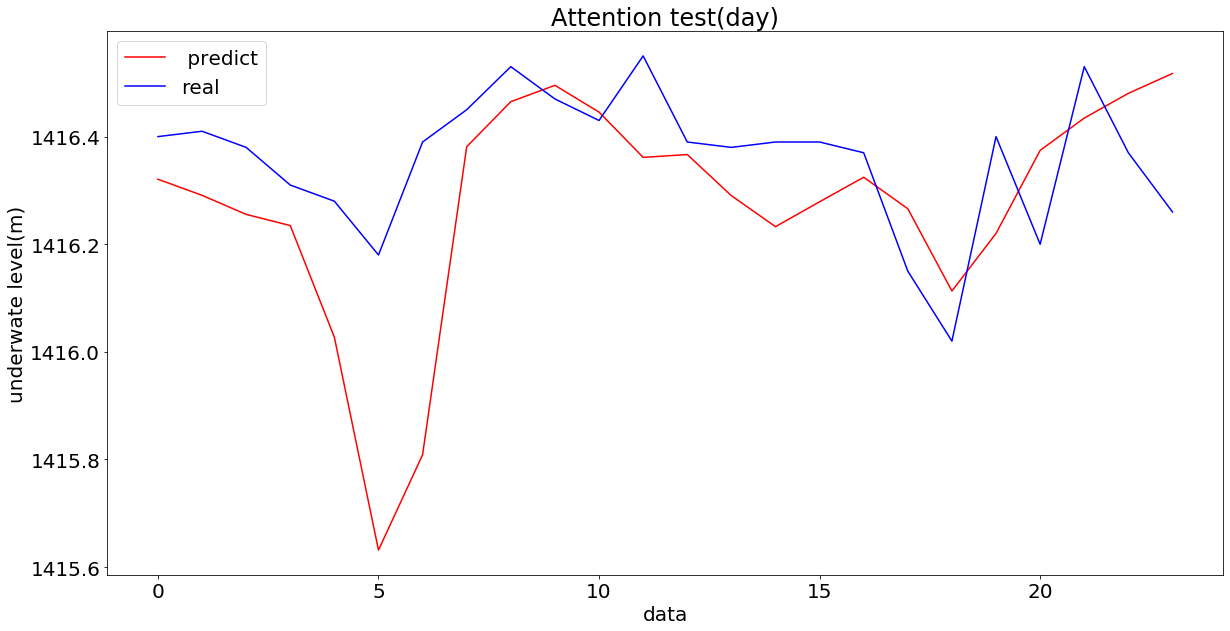

Attention MAE Score: 0.14989400227867122
Attention RMSE Score: 0.20511770584343286
Attention R2 Score:-1.7596885944625984


array([1416.3208, 1416.2909, 1416.2555, 1416.2347, 1416.0272, 1415.6316,
       1415.8087, 1416.3812, 1416.465 , 1416.4954, 1416.4456, 1416.3615,
       1416.3667, 1416.2903, 1416.2327, 1416.2789, 1416.3245, 1416.266 ,
       1416.113 , 1416.2201, 1416.3744, 1416.4344, 1416.4805, 1416.5173],
      dtype=float32)

In [9]:
# from keras.models import load_model
# attention = load_model('model/attention.h5')  
plot_forecast(attention,test_x,'Attention')

In [17]:
inputs = Input(shape=(12, 6))
hidden_tran = Permute((2,1))(inputs)
hidden = LSTM(128, return_sequences=True)(hidden_tran)
att_out, att_scores = Attention(return_attention=True)(hidden)
outputs = Dense(1)(att_out)
m = Model(inputs=[inputs], outputs=[outputs])
print(m.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12, 6)             0         
_________________________________________________________________
permute_1 (Permute)          (None, 6, 12)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 6, 128)            72192     
_________________________________________________________________
attention_2 (Attention)      [(None, 128), (None, 6)]  134       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 72,455
Trainable params: 72,455
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
adam = optimizers.Adam(lr=0.005)
m.compile(loss = 'mean_squared_error', optimizer = adam)
history_attention = m.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose = 1)

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 7770.3111
Epoch 2/100
240/240 [==============================] - 0s 441us/step - loss: 6657.8686
Epoch 3/100
240/240 [==============================] - 0s 446us/step - loss: 5543.0727
Epoch 4/100
240/240 [==============================] - 0s 376us/step - loss: 4428.9263
Epoch 5/100
240/240 [==============================] - 0s 381us/step - loss: 3654.5364
Epoch 6/100
240/240 [==============================] - 0s 382us/step - loss: 3046.1119
Epoch 7/100
240/240 [==============================] - 0s 457us/step - loss: 2543.4797
Epoch 8/100
240/240 [==============================] - 0s 421us/step - loss: 2142.2606
Epoch 9/100
240/240 [==============================] - 0s 400us/step - loss: 1803.1942
Epoch 10/100
240/240 [==============================] - 0s 399us/step - loss: 1526.2825
Epoch 11/100
240/240 [==============================] - 0s 372us/step - loss: 1292.3715
Epoch 12/100
240/240 [=====================

240/240 [==============================] - 0s 366us/step - loss: 86.8755
Epoch 96/100
240/240 [==============================] - 0s 324us/step - loss: 77.4816
Epoch 97/100
240/240 [==============================] - 0s 486us/step - loss: 72.8719
Epoch 98/100
240/240 [==============================] - 0s 393us/step - loss: 73.2131
Epoch 99/100
240/240 [==============================] - 0s 415us/step - loss: 79.0048
Epoch 100/100
240/240 [==============================] - 0s 457us/step - loss: 69.3565


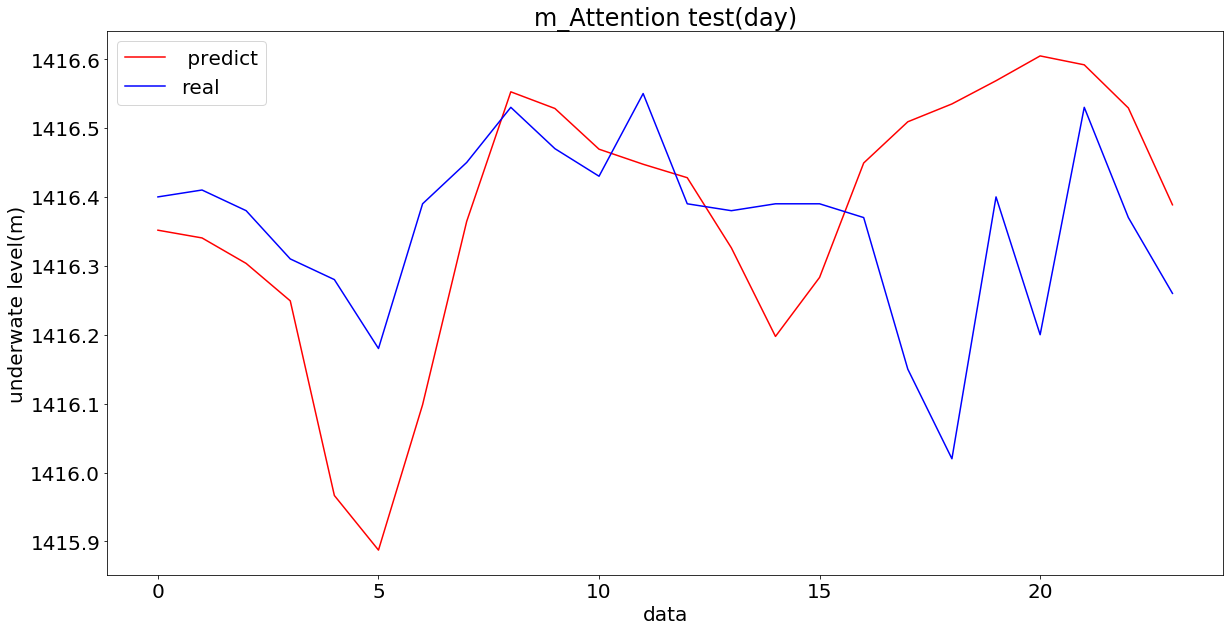

m_Attention MAE Score: 0.1553186035156481
m_Attention RMSE Score: 0.20409305126204266
m_Attention R2 Score:-1.7321857061217867


array([1416.3517, 1416.3405, 1416.3035, 1416.2491, 1415.9667, 1415.8875,
       1416.0984, 1416.3645, 1416.5525, 1416.5283, 1416.4692, 1416.4474,
       1416.4279, 1416.326 , 1416.1975, 1416.2832, 1416.4492, 1416.509 ,
       1416.5349, 1416.5686, 1416.6046, 1416.5917, 1416.529 , 1416.3885],
      dtype=float32)

In [19]:
plot_forecast(m,test_x,'m_Attention')

In [185]:
layer_name = 'attention_20'
intermediate_layer_model = Model(input=m.input,
                                 output=m.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(X_data)
intermediate_output[1].shape
np.mean(intermediate_output[1], axis=0)

/Users/v_zhouhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.10190212, 0.19843256, 0.27017397, 0.20701297, 0.11865373,
       0.10382459], dtype=float32)

In [20]:
ann_1 = Sequential()
ann_1.add(Dense(128, input_dim = 12*6))
ann_1.add(Dense(64))
ann_1.add(Dense(1))
ann_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               9344      
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 17,665
Trainable params: 17,665
Non-trainable params: 0
_________________________________________________________________


In [21]:
adam = optimizers.Adam(lr=0.01)
ann_1.compile(loss = 'mean_squared_error', optimizer = adam)
history_ann = ann_1.fit(X_train.reshape(-1,12*6), y_train, epochs = 100, verbose = 1)

Epoch 1/100
240/240 [==============================] - 0s 516us/step - loss: 7536.7338
Epoch 2/100
240/240 [==============================] - 0s 125us/step - loss: 6461.2489
Epoch 3/100
240/240 [==============================] - 0s 97us/step - loss: 5162.3827
Epoch 4/100
240/240 [==============================] - 0s 121us/step - loss: 2785.5512
Epoch 5/100
240/240 [==============================] - 0s 115us/step - loss: 1332.8855
Epoch 6/100
240/240 [==============================] - 0s 95us/step - loss: 598.9182
Epoch 7/100
240/240 [==============================] - 0s 103us/step - loss: 319.1994
Epoch 8/100
240/240 [==============================] - 0s 120us/step - loss: 450.3156
Epoch 9/100
240/240 [==============================] - 0s 83us/step - loss: 374.1655
Epoch 10/100
240/240 [==============================] - 0s 119us/step - loss: 261.5407
Epoch 11/100
240/240 [==============================] - 0s 95us/step - loss: 211.8342
Epoch 12/100
240/240 [=============================

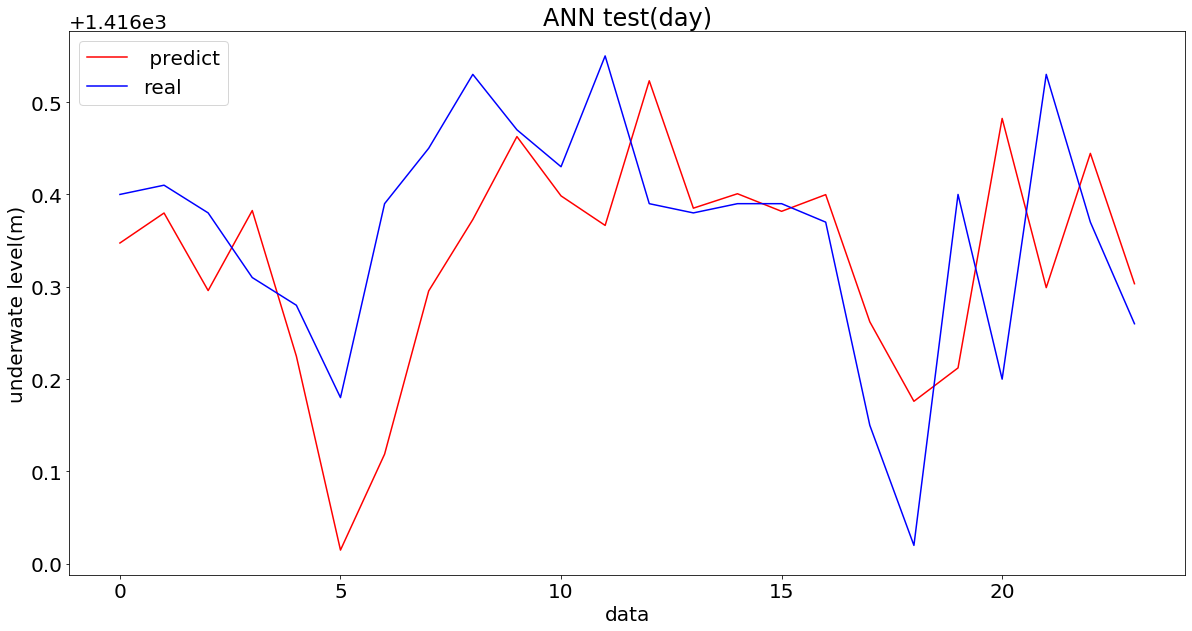

ANN MAE Score: 0.10579121907554168
ANN RMSE Score: 0.13457147421149837
ANN R2 Score:-0.18784506550805635


array([1416.3474, 1416.3799, 1416.2959, 1416.3826, 1416.2249, 1416.0149,
       1416.1188, 1416.2955, 1416.3728, 1416.4626, 1416.3984, 1416.3665,
       1416.5231, 1416.3851, 1416.4008, 1416.3817, 1416.3998, 1416.2621,
       1416.176 , 1416.2122, 1416.4823, 1416.2991, 1416.4445, 1416.3033],
      dtype=float32)

In [22]:
plot_forecast(ann_1,test_x.reshape(-1,12*6),'ANN')

In [10]:
lstm = Sequential()
lstm.add(LSTM(128, input_shape = (12,6)))
lstm.add(Dense(1))
lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               69120     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 69,249
Trainable params: 69,249
Non-trainable params: 0
_________________________________________________________________


In [15]:
import h5py
adam = optimizers.Adam(lr=0.005)
lstm.compile(loss = 'mean_squared_error', optimizer = adam)
history_lstm = lstm.fit(X_train, y_train, epochs = 100, verbose = 1)
# lstm.save('model/lstm.h5')

Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 10.0471
Epoch 2/100
240/240 [==============================] - 0s 640us/step - loss: 11.0830
Epoch 3/100
240/240 [==============================] - 0s 751us/step - loss: 8.2223
Epoch 4/100
240/240 [==============================] - 0s 722us/step - loss: 9.5753
Epoch 5/100
240/240 [==============================] - 0s 668us/step - loss: 7.8923
Epoch 6/100
240/240 [==============================] - 0s 741us/step - loss: 7.2038
Epoch 7/100
240/240 [==============================] - 0s 711us/step - loss: 6.4622
Epoch 8/100
240/240 [==============================] - 0s 678us/step - loss: 6.4100
Epoch 9/100
240/240 [==============================] - 0s 639us/step - loss: 6.4005
Epoch 10/100
240/240 [==============================] - 0s 683us/step - loss: 5.8092
Epoch 11/100
240/240 [==============================] - 0s 654us/step - loss: 5.5857
Epoch 12/100
240/240 [==============================] - 0s 739us/step - lo

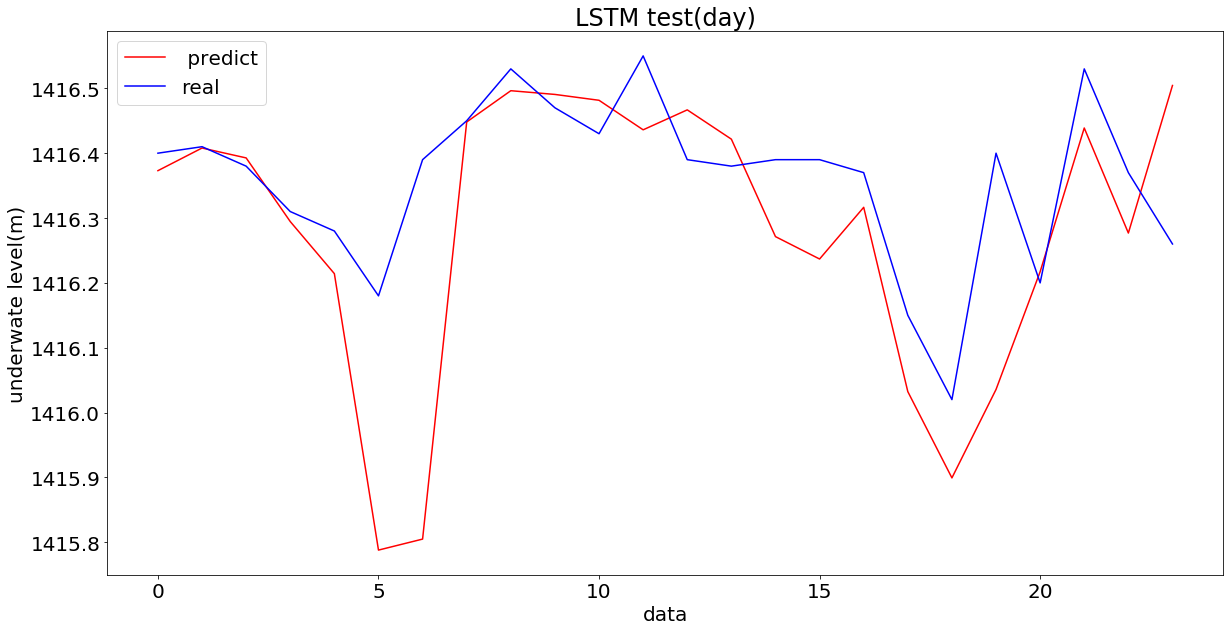

LSTM MAE Score: 0.11725423177082916
LSTM RMSE Score: 0.18312924206567407
LSTM R2 Score:-1.199728966183506


array([1416.373 , 1416.408 , 1416.3927, 1416.2946, 1416.2142, 1415.788 ,
       1415.8049, 1416.4481, 1416.4963, 1416.4906, 1416.4816, 1416.436 ,
       1416.4668, 1416.4216, 1416.2714, 1416.2368, 1416.3165, 1416.0323,
       1415.8993, 1416.0356, 1416.2173, 1416.4388, 1416.2769, 1416.5044],
      dtype=float32)

In [16]:
# lstm = load_model('model/lstm.h5')  
plot_forecast(lstm,test_x,'LSTM')

In [12]:
rnn_1 = Sequential()
rnn_1.add(SimpleRNN(128, input_shape = (12,6)))
rnn_1.add(Dense(1))
rnn_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               17280     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [13]:
import h5py
adam = optimizers.Adam(lr=0.01)
rnn_1.compile(loss = 'mean_squared_error', optimizer = adam)
history_rnn1 = rnn_1.fit(X_train, y_train, epochs = 100, verbose = 1)
# rnn_1.save('model/rnn.h5')

Epoch 1/100
240/240 [==============================] - 0s 2ms/step - loss: 7568.6051
Epoch 2/100
240/240 [==============================] - 0s 270us/step - loss: 6595.7675
Epoch 3/100
240/240 [==============================] - 0s 268us/step - loss: 6202.3654
Epoch 4/100
240/240 [==============================] - 0s 271us/step - loss: 5877.7101
Epoch 5/100
240/240 [==============================] - 0s 313us/step - loss: 5760.2085
Epoch 6/100
240/240 [==============================] - 0s 296us/step - loss: 5604.7121
Epoch 7/100
240/240 [==============================] - 0s 254us/step - loss: 5573.8681
Epoch 8/100
240/240 [==============================] - 0s 275us/step - loss: 5517.6178
Epoch 9/100
240/240 [==============================] - ETA: 0s - loss: 5365.10 - 0s 293us/step - loss: 5414.3200
Epoch 10/100
240/240 [==============================] - 0s 295us/step - loss: 5123.2038
Epoch 11/100
240/240 [==============================] - 0s 345us/step - loss: 3288.1751
Epoch 12/100
240/

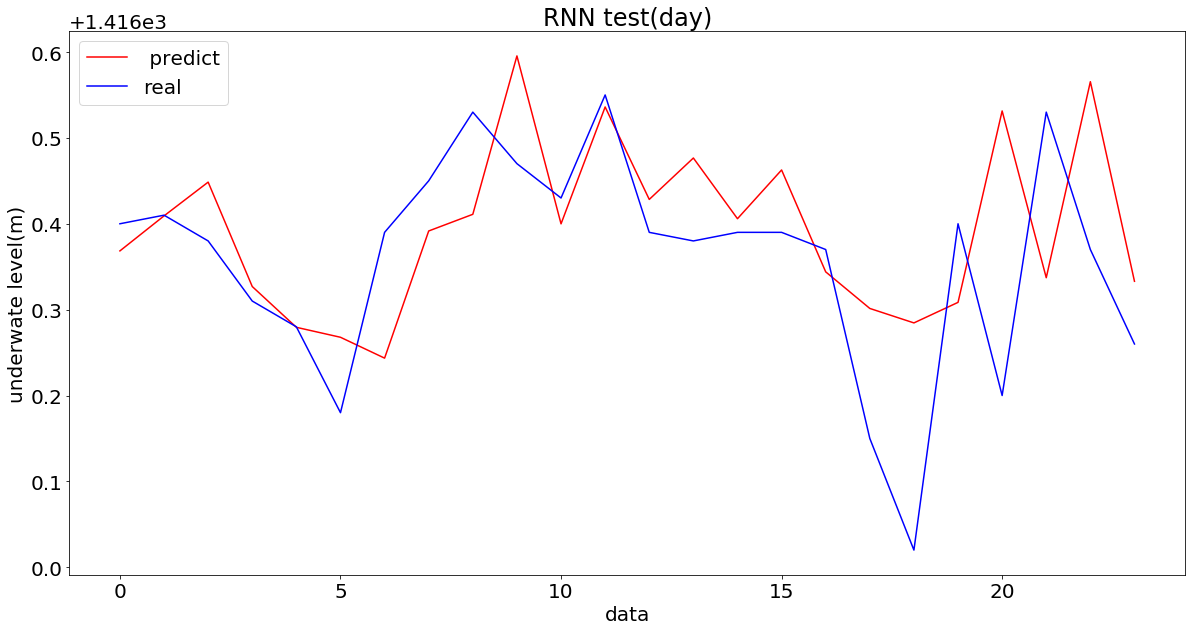

RNN MAE Score: 0.09371541341144507
RNN RMSE Score: 0.12555744057052348
RNN R2 Score:-0.034043207696833555


array([1416.3684, 1416.4092, 1416.4485, 1416.3269, 1416.2794, 1416.2678,
       1416.2435, 1416.3916, 1416.411 , 1416.5955, 1416.3999, 1416.536 ,
       1416.4283, 1416.4766, 1416.4059, 1416.4626, 1416.344 , 1416.3014,
       1416.2845, 1416.3085, 1416.5314, 1416.3372, 1416.5654, 1416.333 ],
      dtype=float32)

In [36]:
plot_forecast(rnn_1,test_x,'RNN')

In [54]:
inputs = Input(shape=(12, 6))
hidden_tran = Permute((2,1))(inputs)
att_out, att_scores = Attention(return_attention=True)(hidden_tran)
att_out = Dense(128)(att_out)
att_out = Dense(64)(att_out)
# hidden = LSTM(128, return_sequences=True)(hidden_tran)
# att_out = Flatten()(att_out)
outputs = Dense(1)(att_out)
m = Model(inputs=[inputs], outputs=[outputs])
print(m.summary())

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 12, 6)             0         
_________________________________________________________________
permute_13 (Permute)         (None, 6, 12)             0         
_________________________________________________________________
attention_12 (Attention)     [(None, 12), (None, 6)]   18        
_________________________________________________________________
dense_40 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_41 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 10,003
Trainable params: 10,003
Non-trainable params: 0
______________________________________________________

In [55]:
adam = optimizers.Adam(lr=0.01)
m.compile(loss = 'mean_squared_error', optimizer = adam)
history_attention = m.fit(X_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
240/240 [==============================] - 0s 818us/step - loss: 6920.9195
Epoch 2/100
240/240 [==============================] - 0s 120us/step - loss: 4506.6612
Epoch 3/100
240/240 [==============================] - 0s 133us/step - loss: 2153.0512
Epoch 4/100
240/240 [==============================] - 0s 126us/step - loss: 907.4797
Epoch 5/100
240/240 [==============================] - 0s 139us/step - loss: 388.9203
Epoch 6/100
240/240 [==============================] - 0s 136us/step - loss: 421.5339
Epoch 7/100
240/240 [==============================] - 0s 149us/step - loss: 351.5097
Epoch 8/100
240/240 [==============================] - 0s 167us/step - loss: 324.4677
Epoch 9/100
240/240 [==============================] - 0s 132us/step - loss: 324.2969
Epoch 10/100
240/240 [==============================] - 0s 139us/step - loss: 306.1609
Epoch 11/100
240/240 [==============================] - 0s 130us/step - loss: 307.0461
Epoch 12/100
240/240 [===========================

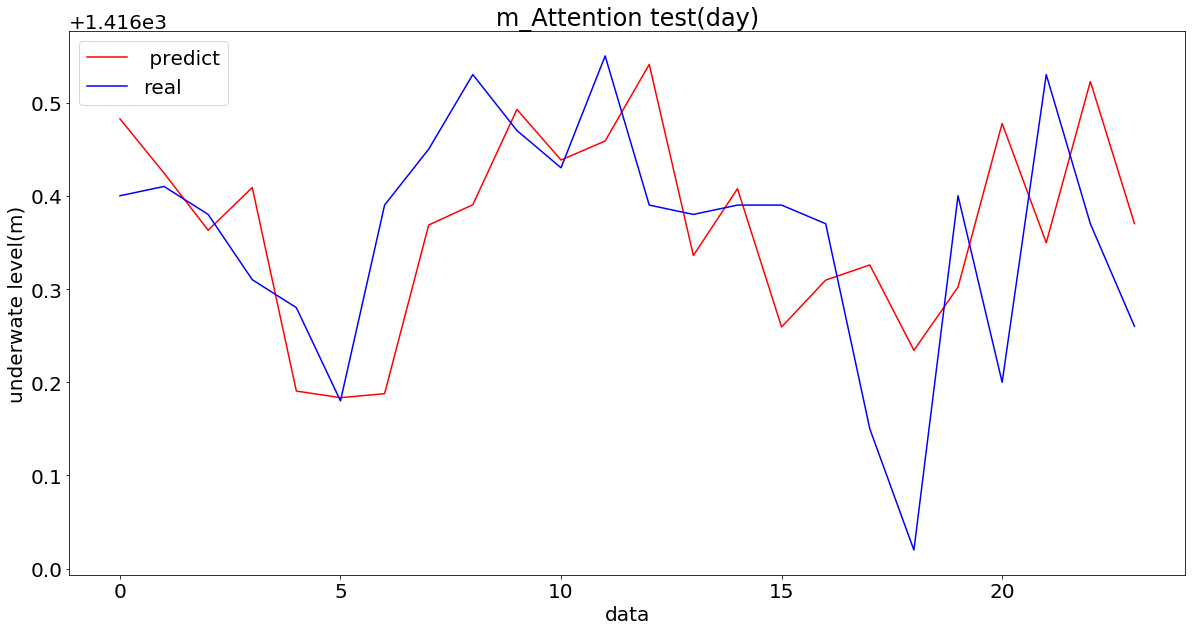

m_Attention MAE Score: 0.10263387044270189
m_Attention RMSE Score: 0.12552162910409742
m_Attention R2 Score:-0.033453432650179415


array([1416.4825, 1416.4243, 1416.363 , 1416.4088, 1416.1906, 1416.1835,
       1416.1877, 1416.3687, 1416.3904, 1416.4926, 1416.4384, 1416.4587,
       1416.5409, 1416.3359, 1416.4076, 1416.2593, 1416.3096, 1416.3258,
       1416.2343, 1416.3021, 1416.4775, 1416.3496, 1416.5226, 1416.3701],
      dtype=float32)

In [56]:
plot_forecast(m,test_x,'m_Attention')

In [78]:
layer_name = 'attention_15'
intermediate_layer_model = Model(input=m.input,
                                 output=m.get_layer(layer_name).output)
intermediate_output = intermediate_layer_model.predict(test_x)
np.mean(intermediate_output[1], axis=0)

/Users/v_zhouhan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=[<tf.Tenso...)`
  This is separate from the ipykernel package so we can avoid doing imports until


array([0.06992013, 0.13766931, 0.25467604, 0.07884522, 0.13839854,
       0.3204907 ], dtype=float32)

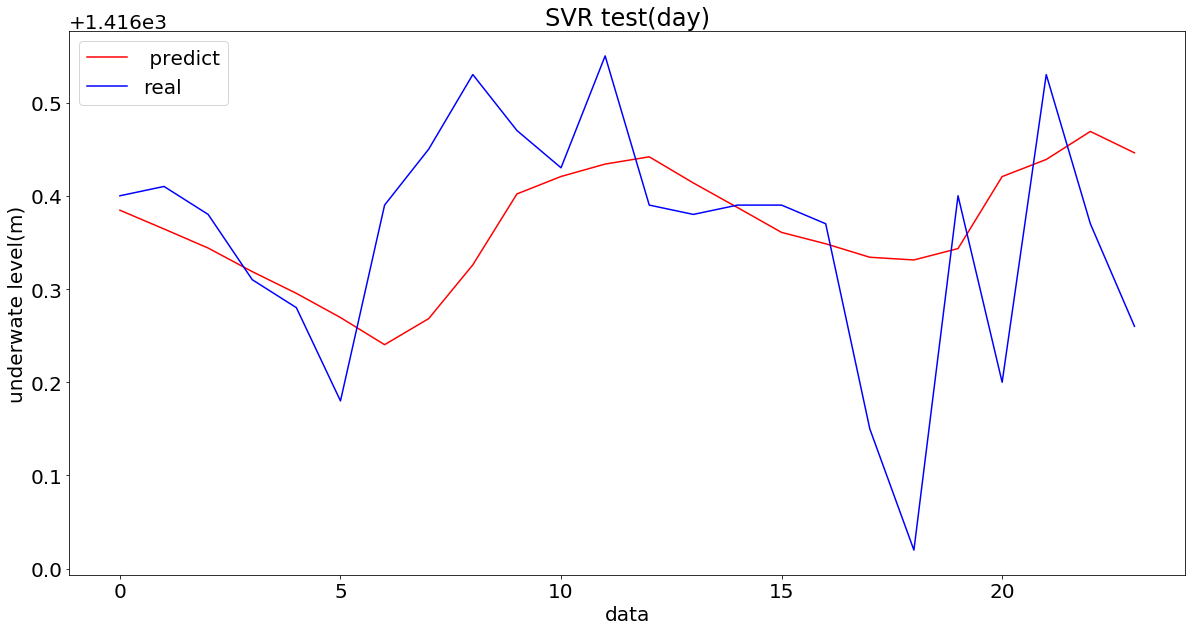

SVR MAE Score: 0.0927884179202086
SVR RMSE Score: 0.12376237655351356
SVR R2 Score:-0.004687637613203455


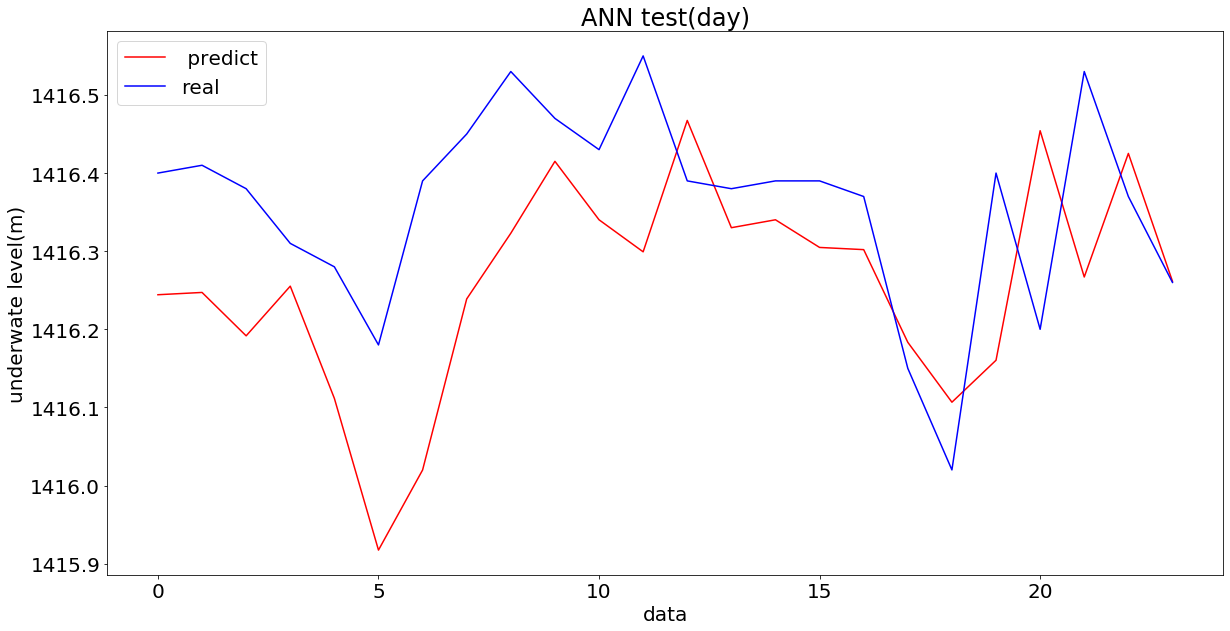

ANN MAE Score: 0.14334716796877464
ANN RMSE Score: 0.17208309296146532
ANN R2 Score:-0.942362050756107


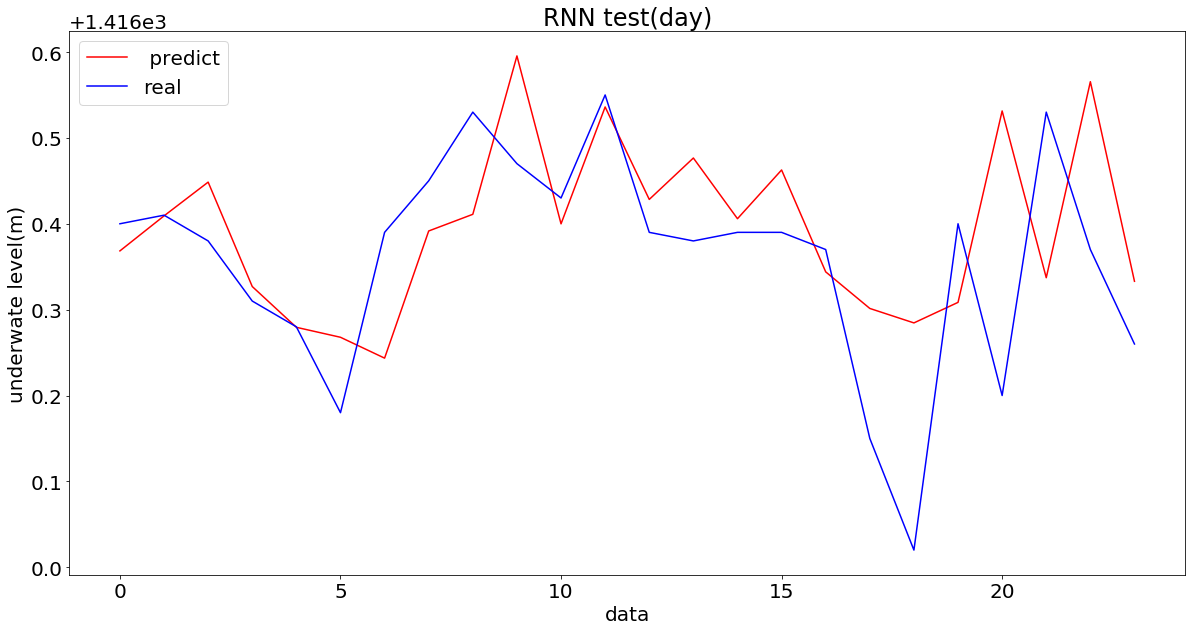

RNN MAE Score: 0.09371541341144507
RNN RMSE Score: 0.12555744057052348
RNN R2 Score:-0.034043207696833555


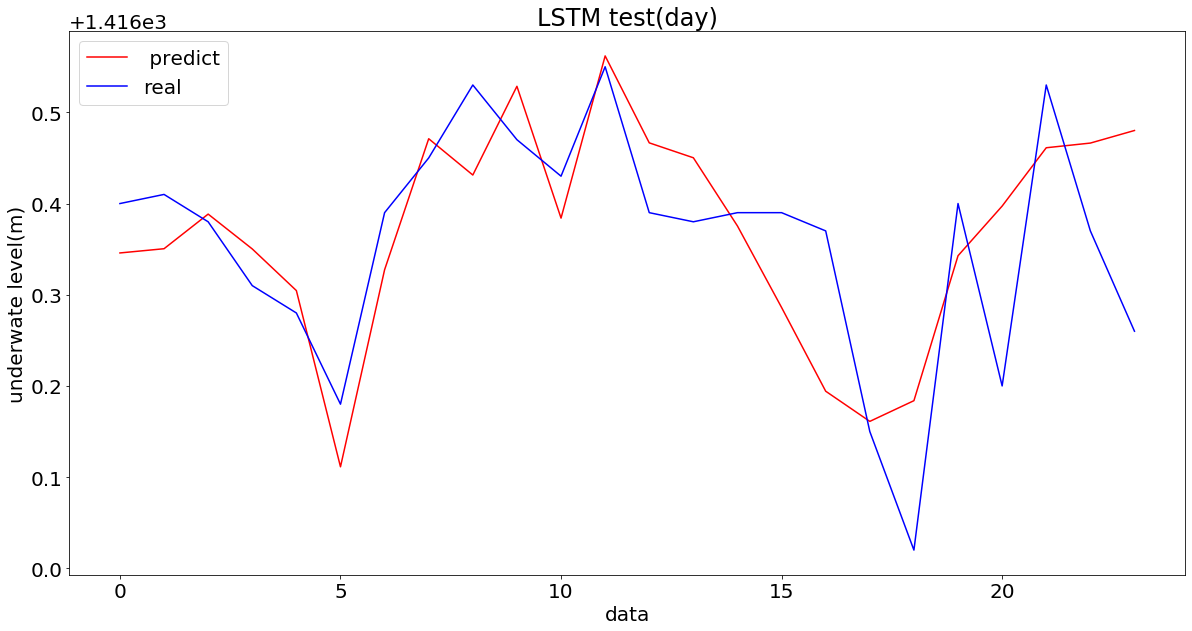

LSTM MAE Score: 0.07542582194011516
LSTM RMSE Score: 0.09521703545550556
LSTM R2 Score:0.40532033338510043


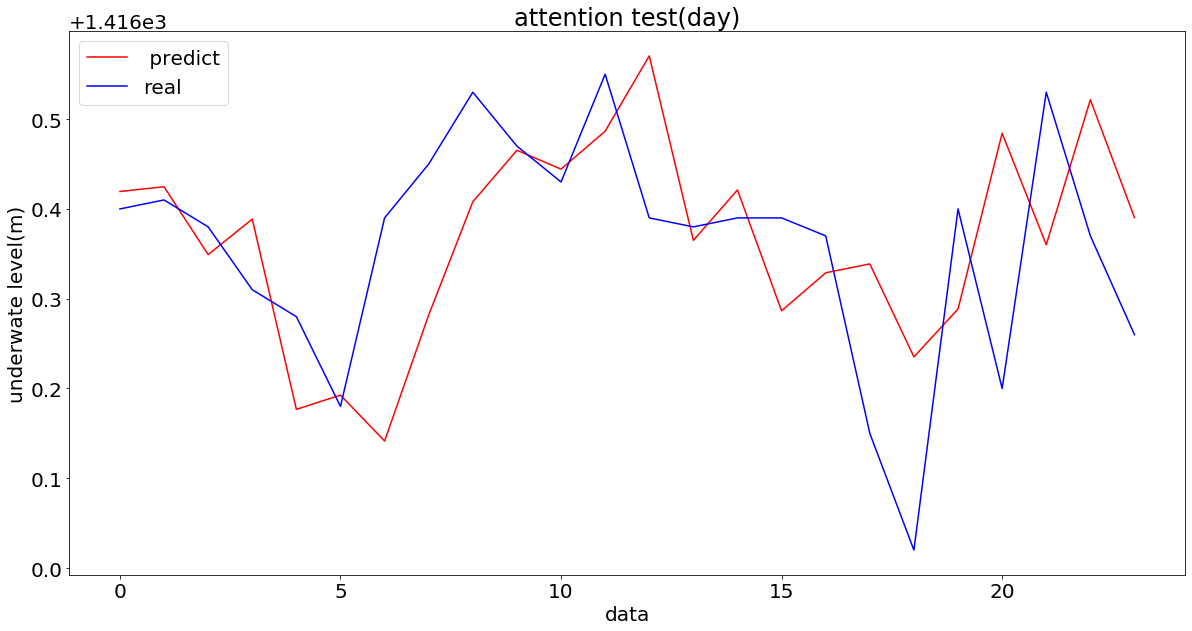

attention MAE Score: 0.10430969238280834
attention RMSE Score: 0.13195646259204505
attention R2 Score:-0.1421288640219185


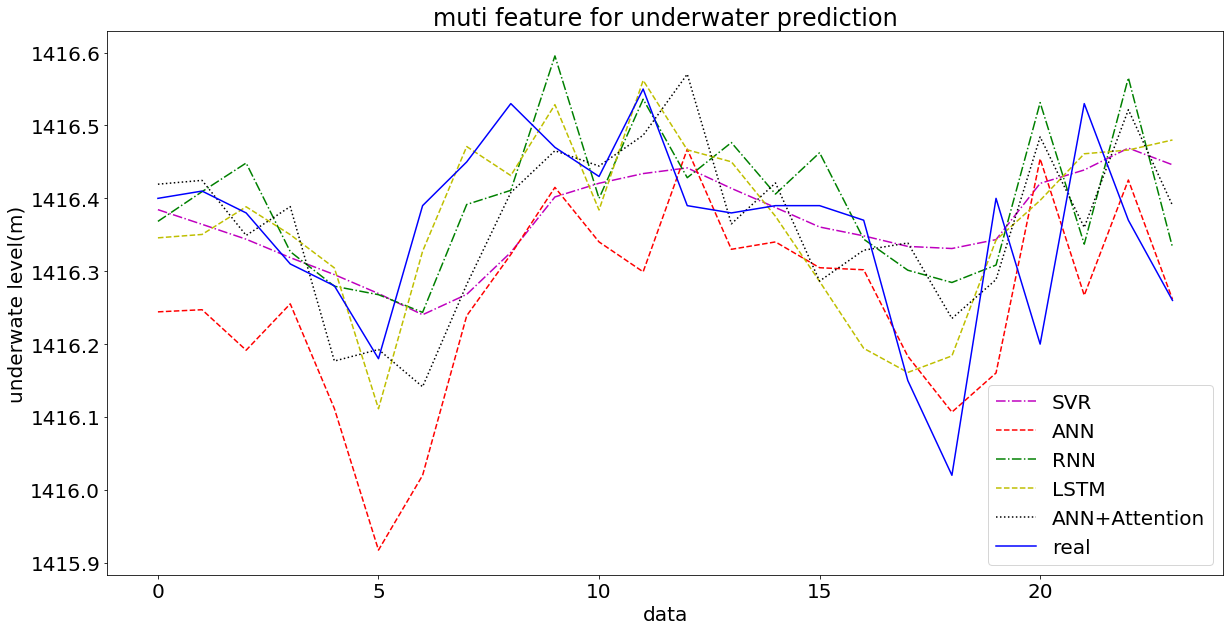

In [91]:
svr_test = plot_forecast(SVRModel,test_x.reshape(-1, 12*6),'SVR')
ann_test = plot_forecast(ann_1,test_x.reshape(-1, 12*6),'ANN')
rnn_test = plot_forecast(rnn_1,test_x,'RNN')
lstm_test = plot_forecast(lstm,test_x,'LSTM')
att_test = plot_forecast(m,test_x,'attention')

plt.plot(svr_test.reshape(-1),'m-.',label = 'SVR')
plt.plot(ann_test.reshape(-1),'r--',label = 'ANN')
plt.plot(rnn_test.reshape(-1),'g-.',label = 'RNN')
plt.plot(lstm_test.reshape(-1),'y--',label = 'LSTM')
plt.plot(att_test.reshape(-1),'k:',label = 'ANN+Attention')
plt.plot(range(24),data_22[-24:],'b',label = 'real')
plt.xlabel('data')
plt.ylabel('underwate level(m)')
plt.title('muti feature for underwater prediction')
plt.legend()
plt.show()

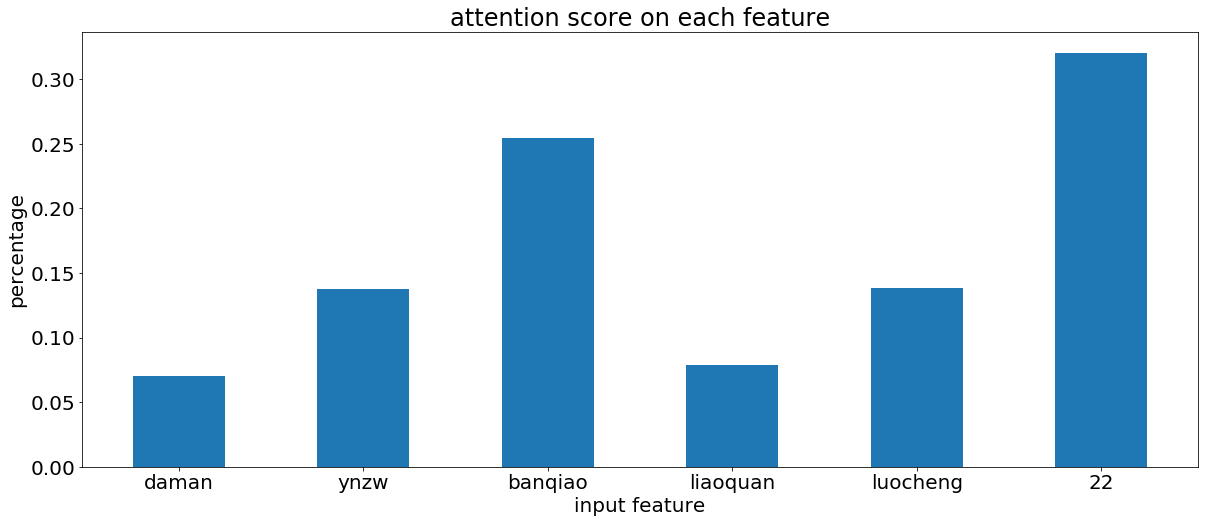

In [93]:
plt.figure(figsize=(20, 8))
plt.bar(range(6), np.mean(intermediate_output[1], axis=0), width=0.5)
plt.xticks(range(6), ['daman', 'ynzw', 'banqiao', 'liaoquan', 'luocheng', '22'])
plt.xlabel('input feature')
plt.ylabel('percentage')
plt.title('attention score on each feature')
plt.show()

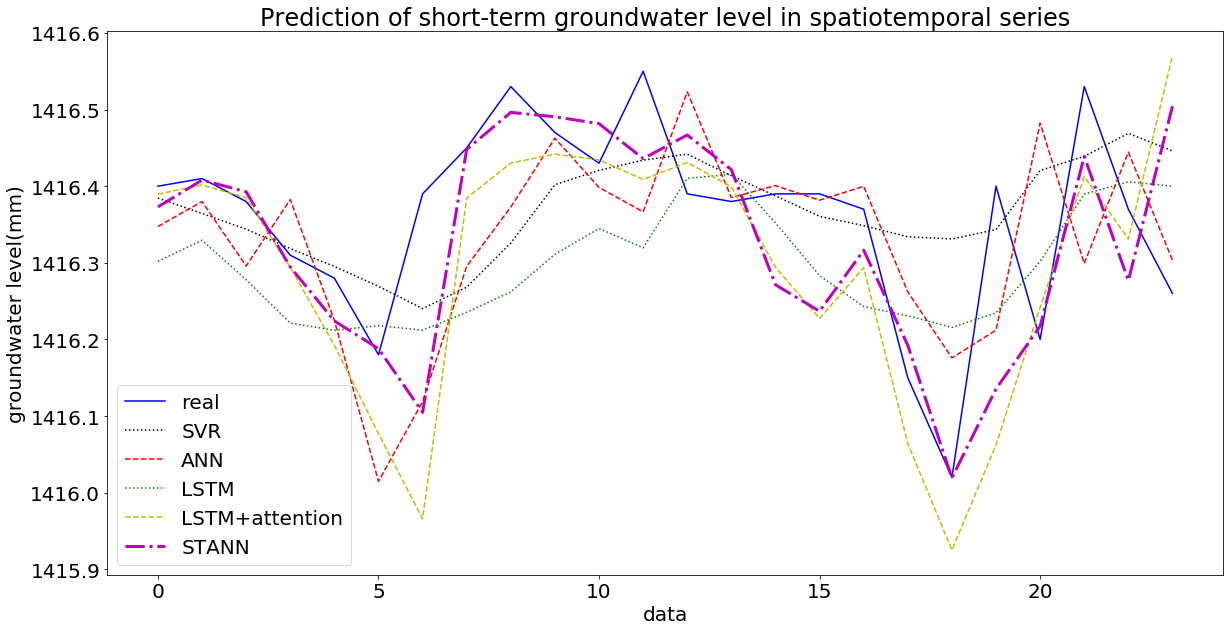

ARIMA MAE Score: 0.09278841791670327
ARIMA RMSE Score: 0.12376237637466588
ARIMA R2 Score: -0.004687634709476862
ANN MAE Score: 0.10579166666667561
ANN RMSE Score: 0.13456521653087708
ANN R2 Score: -0.18773459659527614
LSTM MAE Score: 0.11654583333334283
LSTM RMSE Score: 0.133722662315216
LSTM R2 Score: -0.17290761714990244
LSTM+attention MAE Score: 0.1006041666666988
LSTM+attention RMSE Score: 0.14726541090837483
LSTM+attention R2 Score: -0.4225098582255449
STANN MAE Score: 0.07603749999999347
STANN RMSE Score: 0.11172015074880251
STANN R2 Score: 0.18131505551428573


In [6]:
def get_org(arr):
    return (arr/100)+min(data_22)
# 此处数据为为了画图方便，最优模型复制过来的。训练过程需要调参，epoch、lr等
svr_test = [1416.38449628, 1416.36438504, 1416.34393095, 1416.31866771,
       1416.29537134, 1416.26939705, 1416.24029237, 1416.2682401 ,
       1416.32591665, 1416.40195625, 1416.42069179, 1416.43399685,
       1416.44178642, 1416.41372893, 1416.3874035 , 1416.36069843,
       1416.34853335, 1416.33405577, 1416.33117308, 1416.34338202,
       1416.42057196, 1416.43895392, 1416.46899454, 1416.44605273]
ann_test = [1416.3474, 1416.3799, 1416.2959, 1416.3826, 1416.2249, 1416.0149,
       1416.1188, 1416.2955, 1416.3728, 1416.4626, 1416.3984, 1416.3665,
       1416.5231, 1416.3851, 1416.4008, 1416.3817, 1416.3998, 1416.2621,
       1416.176 , 1416.2122, 1416.4823, 1416.2991, 1416.4445, 1416.3033]
lstm_test = [1416.302 , 1416.3295, 1416.278 , 1416.2214, 1416.212 , 1416.218 ,
       1416.2122, 1416.2355, 1416.262 , 1416.3112, 1416.3448, 1416.3196,
       1416.4103, 1416.4155, 1416.3522, 1416.2833, 1416.243 , 1416.231 ,
       1416.2157, 1416.2347, 1416.3019, 1416.3896, 1416.4058, 1416.3999]
att_test = [1416.3895, 1416.4017, 1416.3849, 1416.2943, 1416.1924, 1416.0772,
       1415.966 , 1416.3844, 1416.4303, 1416.4418, 1416.4344, 1416.4088,
       1416.431 , 1416.3992, 1416.2942, 1416.2275, 1416.2937, 1416.0643,
       1415.9252, 1416.0623, 1416.2421, 1416.4125, 1416.331 , 1416.57  ]
mas_test = [1416.373 , 1416.408 , 1416.3927, 1416.2946, 1416.2242, 1416.188 ,
       1416.1049, 1416.4481, 1416.4963, 1416.4906, 1416.4816, 1416.436 ,
       1416.4668, 1416.4216, 1416.2714, 1416.2368, 1416.3165, 1416.1923,
       1416.0193, 1416.1356, 1416.2173, 1416.4388, 1416.2769, 1416.5044]
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size':20})
plt.plot(range(24),data_22[-24:],'b',label = 'real')
plt.plot(svr_test,'k:',label = 'SVR')
plt.plot(ann_test,'r--',label = 'ANN')
plt.plot(lstm_test,'g:',label = 'LSTM')
plt.plot(att_test,'y--',label = 'LSTM+attention')
plt.plot(mas_test,'m-.',label = 'STANN', linewidth = '3')
plt.xlabel('data')
plt.ylabel('groundwater level(mm)')
plt.title('Prediction of short-term groundwater level in spatiotemporal series')
plt.legend()
plt.show()

def get_result(model_res,title):
    mae_score = mean_absolute_error(data_22[-24:], model_res)
    rmse_score = rmse(data_22[-24:], model_res)
    r2 = r2_score(data_22[-24:], model_res)
    print(str(title)+' MAE Score: '+str(mae_score))
    print(str(title)+' RMSE Score: '+str(rmse_score))
    print(str(title)+' R2 Score: '+str(r2))
get_result(svr_test,'ARIMA')
get_result(ann_test,'ANN')
get_result(lstm_test,'LSTM')
get_result(att_test,'LSTM+attention')
get_result(mas_test,'STANN')


In [63]:
test = [1416.26,1416.52,1416.42,1416.45,1416.38,1416.32,1416.35,1416.16,1416.27,1416.41,1416.45,1416.39,1416.05]
test_2009 = []
for i in range(len(test)):
    test_2009.extend(np.linspace(test[i],test[i+1],4)[:-1])

IndexError: list index out of range

In [69]:
test_2008 = []
test_2008.append(data_scaled[-36:])
test_2008 = np.array(test_2008)

In [132]:
test_predict_2009 = attention.predict(test_2008)

In [72]:
test_2009 = (test_2009-min(data_22))*100

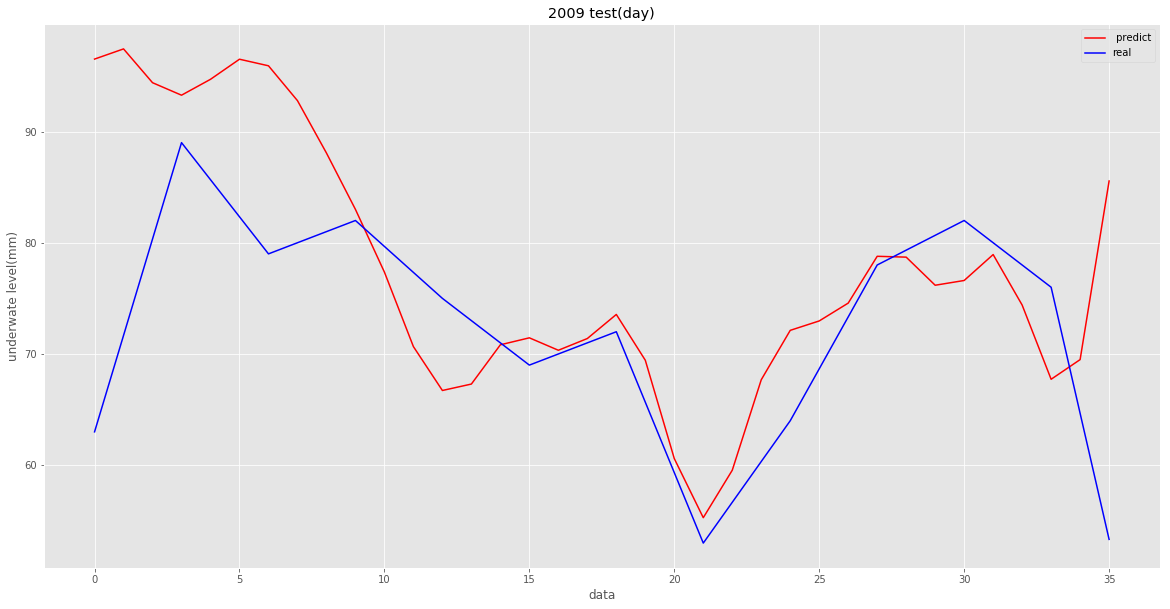

TEST MAE Score: 7.191145261134327
TEST RMSE Score: 10.938374772454464


In [133]:
plt.plot(test_predict_2009.reshape(-1),'r',label = ' predict')
plt.plot(range(36),test_2009,'b',label = 'real')
plt.xlabel('data')
plt.ylabel('underwate level(mm)')
plt.title('2009'+' test(day)')
plt.legend()
plt.show()
mae_score = mean_absolute_error(test_2009, test_predict_2009.reshape(-1))
rmse_score = rmse(test_2009, test_predict_2009.reshape(-1))
print('TEST MAE Score: '+str(mae_score))
print('TEST RMSE Score: '+str(rmse_score))

In [ ]:
[1416.302 , 1416.3295, 1416.278 , 1416.2214, 1416.212 , 1416.218 ,
       1416.2122, 1416.2355, 1416.262 , 1416.3112, 1416.3448, 1416.3196,
       1416.4103, 1416.4155, 1416.3522, 1416.2833, 1416.243 , 1416.231 ,
       1416.2157, 1416.2347, 1416.3019, 1416.3896, 1416.4058, 1416.3999]
[1416.3895, 1416.4017, 1416.3849, 1416.2943, 1416.1924, 1415.9772,
       1415.966 , 1416.3844, 1416.4303, 1416.4418, 1416.4344, 1416.4088,
       1416.431 , 1416.3992, 1416.2942, 1416.2275, 1416.2937, 1416.0643,
       1415.9252, 1416.0623, 1416.2421, 1416.4125, 1416.331 , 1416.57  ]
[1416.373 , 1416.408 , 1416.3927, 1416.2946, 1416.2142, 1415.788 ,
       1415.8049, 1416.4481, 1416.4963, 1416.4906, 1416.4816, 1416.436 ,
       1416.4668, 1416.4216, 1416.2714, 1416.2368, 1416.3165, 1416.0323,
       1415.8993, 1416.0356, 1416.2173, 1416.4388, 1416.2769, 1416.5044]
